In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
from sklearn.datasets import load_diabetes 
import matplotlib.pyplot as plt
import numpy as np

from asa.correlation_methods import get_RF_importance, get_MI
from asa.dataset import Dataset

## Use dataset

In [31]:
data = load_diabetes()

dataset = Dataset(np.hstack((data.data, data.target[:, None])), data.feature_names + ['diabetes'])

Check the result:
  Train score:  0.9092236040956053
  Test score:  0.4853613013025827


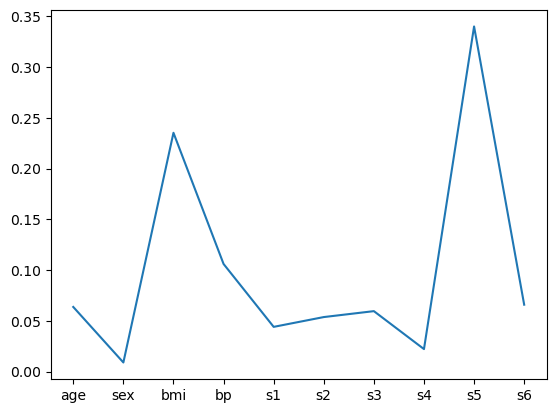

In [4]:
importance, score = dataset.get_RF_importance(
    ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'],
    'diabetes',
    problem_type='regression',
    RF_kwargs={
        'n_estimators': 1000,
        'max_depth': 10
    })

plt.plot(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'], importance)


In [23]:
importance, score = dataset.get_RF_importance(
    ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'],
    'diabetes',
    problem_type='regression',
    RF_kwargs={
        'n_estimators': 100,
        'max_depth': 5
    },
    importance_type='permutation')

Check the result:
  Train score:  0.7147434530517376
  Test score:  0.5051044243718033


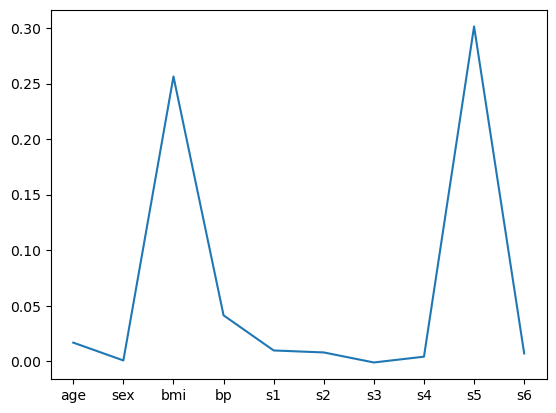

In [24]:
plt.plot(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'],
         importance.importances_mean)

In [42]:
importance_list, test_score_list = dataset.get_RF_importance_bootstrap(
    ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'],
    'diabetes',
    problem_type='regression',
    RF_kwargs={
        'n_estimators': 100,
        'max_depth': 5
    },
    N_bootstrap=100,
    check_res=False,
    add_random=True)

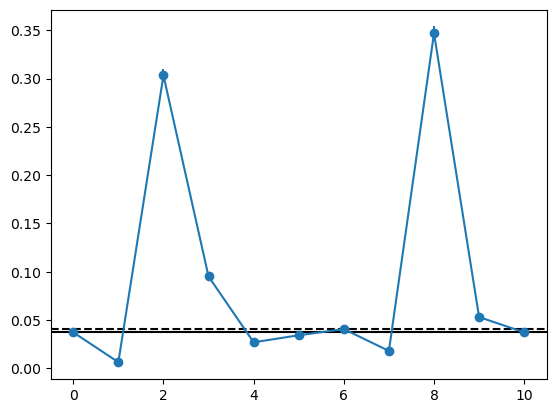

In [54]:
plt.errorbar(np.arange(importance_list.shape[1]),
             importance_list.mean(axis=0),
             yerr=importance_list.std(axis=0)/10,
             fmt='-o')
plt.axhline(importance_list[:, -1].mean(), color='k', linestyle='-')
plt.axhline(importance_list[:, -1].mean() +
            3 * importance_list[:, -1].std() / 10,
            color='k',
            linestyle='--')

## Use func

### RF

In [8]:
# generate regression data
data = load_diabetes()

In [9]:
x = data['data']
y = data['target']
x_label = data['feature_names']

In [10]:
feature_importance, score_test, score_train, rf, X_train, X_test, y_train, y_test = get_RF_importance(
    x,
    y,
    'regression',
    return_more=True,
    RF_kwargs={
        'n_estimators': 1000,
        'max_depth': 3,
        'random_state': 0
    })

In [11]:
rf.score(X_train, y_train), score_train

(0.6009615603107766, 0.6009615603107766)

In [12]:
rf.score(X_test, y_test), score_test

(0.3742291185844151, 0.3742291185844151)

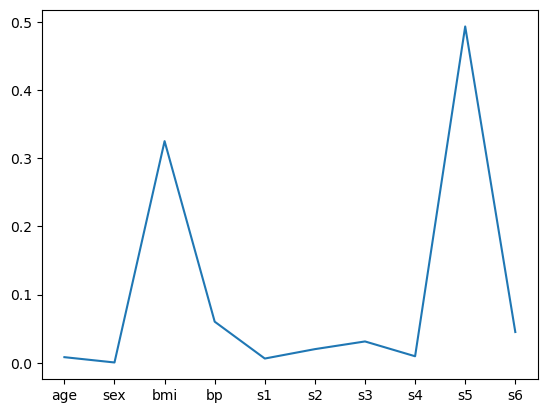

In [13]:
plt.plot(x_label, feature_importance)

In [14]:
feature_importance, score_test, score_train, rf, X_train, X_test, y_train, y_test = get_RF_importance(
    x, y, 'regression', return_more=True, importance_type='permutation')

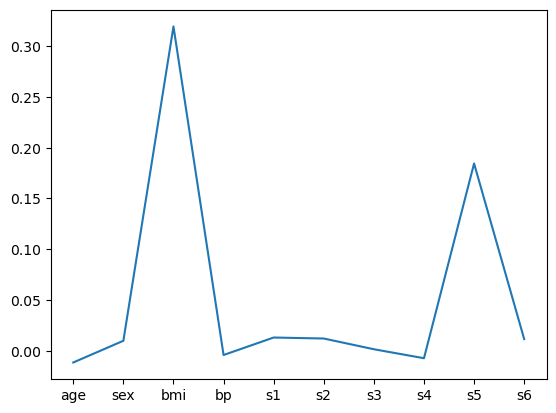

In [15]:
plt.plot(x_label, feature_importance.importances_mean)

In [23]:
feature_importance, score_test, score_train, rf, X_train, X_test, y_train, y_test = get_RF_importance(
    x,
    y,
    'regression',
    return_more=True,
    add_random=True,
    n_random=2,
    RF_kwargs={
        'n_estimators': 1000,
        'max_depth': 3
    })

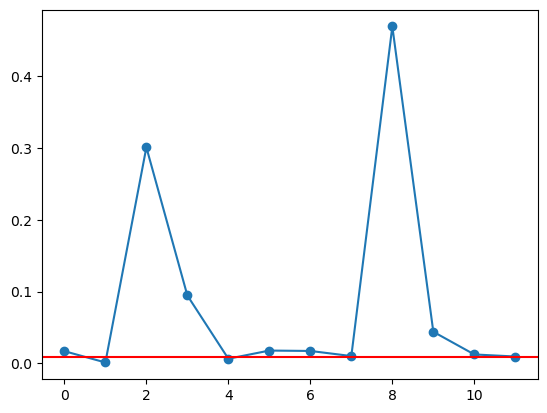

In [30]:
plt.plot(feature_importance, '-o')
# plt.scatter(len(feature_importance) - 1, feature_importance[-1])
plt.axhline(y=feature_importance[-1], color='r', linestyle='-')

### MI

In [3]:
data = load_diabetes()

x = data['data']
y = data['target']
x_label = data['feature_names']

In [5]:
x.shape

(442, 10)

In [22]:
get_MI(x[:, 2], y)

0.4438740661883944

In [17]:
get_MI(x[:, 2],
       y,
       is_qt=True,
       x_qt_kwargs={
           'n_quantiles': 100,
           'output_distribution': 'normal'
       },
       y_qt_kwargs={
           'n_quantiles': 100,
           'output_distribution': 'normal'
       })

0.2334246248051426

In [18]:
get_MI(x[:, 2],
       y,
       is_qt=True,
       robust=True,
       x_qt_kwargs={
           'n_quantiles': 100,
           'output_distribution': 'normal'
       },
       y_qt_kwargs={
           'n_quantiles': 100,
           'output_distribution': 'normal'
       })

(array([0.61898146]), array([1.39589798]), 0.24911382836734797)

In [21]:
get_MI(x[:, 2], y, robust=True)

(array([1.66035631]), array([0.70047688]), 0.4443265548763531)

In [25]:
get_MI(x[:, [2, 8]], y)

0.4520841483075628

In [26]:
get_MI(x[:, [2, 8]],
       y,
       is_qt=True,
       x_qt_kwargs={
           'n_quantiles': 100,
           'output_distribution': 'normal'
       },
       y_qt_kwargs={
           'n_quantiles': 100,
           'output_distribution': 'normal'
       })

0.31385969053399254

In [27]:
get_MI(x[:, [2, 8]],
       y,
       is_qt=True,
       robust=True,
       x_qt_kwargs={
           'n_quantiles': 100,
           'output_distribution': 'normal'
       },
       y_qt_kwargs={
           'n_quantiles': 100,
           'output_distribution': 'normal'
       })

(array([1.95578257, 0.806982  ]), array([0.88905323]), 0.34864293380365474)

In [28]:
get_MI(x[:, [2, 8]], y, robust=True)

(array([0.96107969, 1.5288059 ]), array([0.54198534]), 0.45566501889488187)